## UTS Penambangan Data ##

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cirrhosis.csv to cirrhosis.csv


# 1. Pemahaman Data (Data Understanding)

In [40]:
# Import pustaka
import pandas as pd

# Baca file CSV (pastikan kamu sudah upload file 'cirrhosis.csv' ke Colab)
df = pd.read_csv('/content/cirrhosis.csv')

# Tampilkan 5 baris pertama
df.head()


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


# 2. Pemrosesan awal data (Preprocessing )

,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
count,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000
mean,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731
std,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000
min,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000
25%,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000
50%,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000
75%,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000
max,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000


,0
ID,0
N_Days,0
Status,0
Drug,106
Age,0
Sex,0
Ascites,106
Hepatomegaly,106
Spiders,106
Edema,0


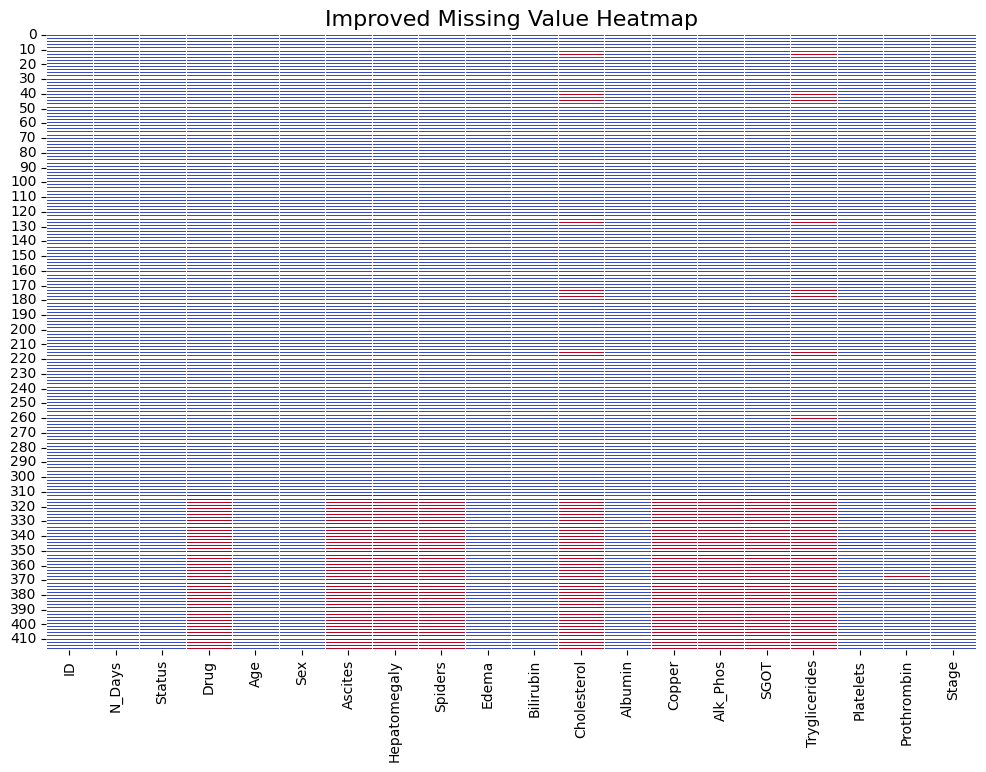

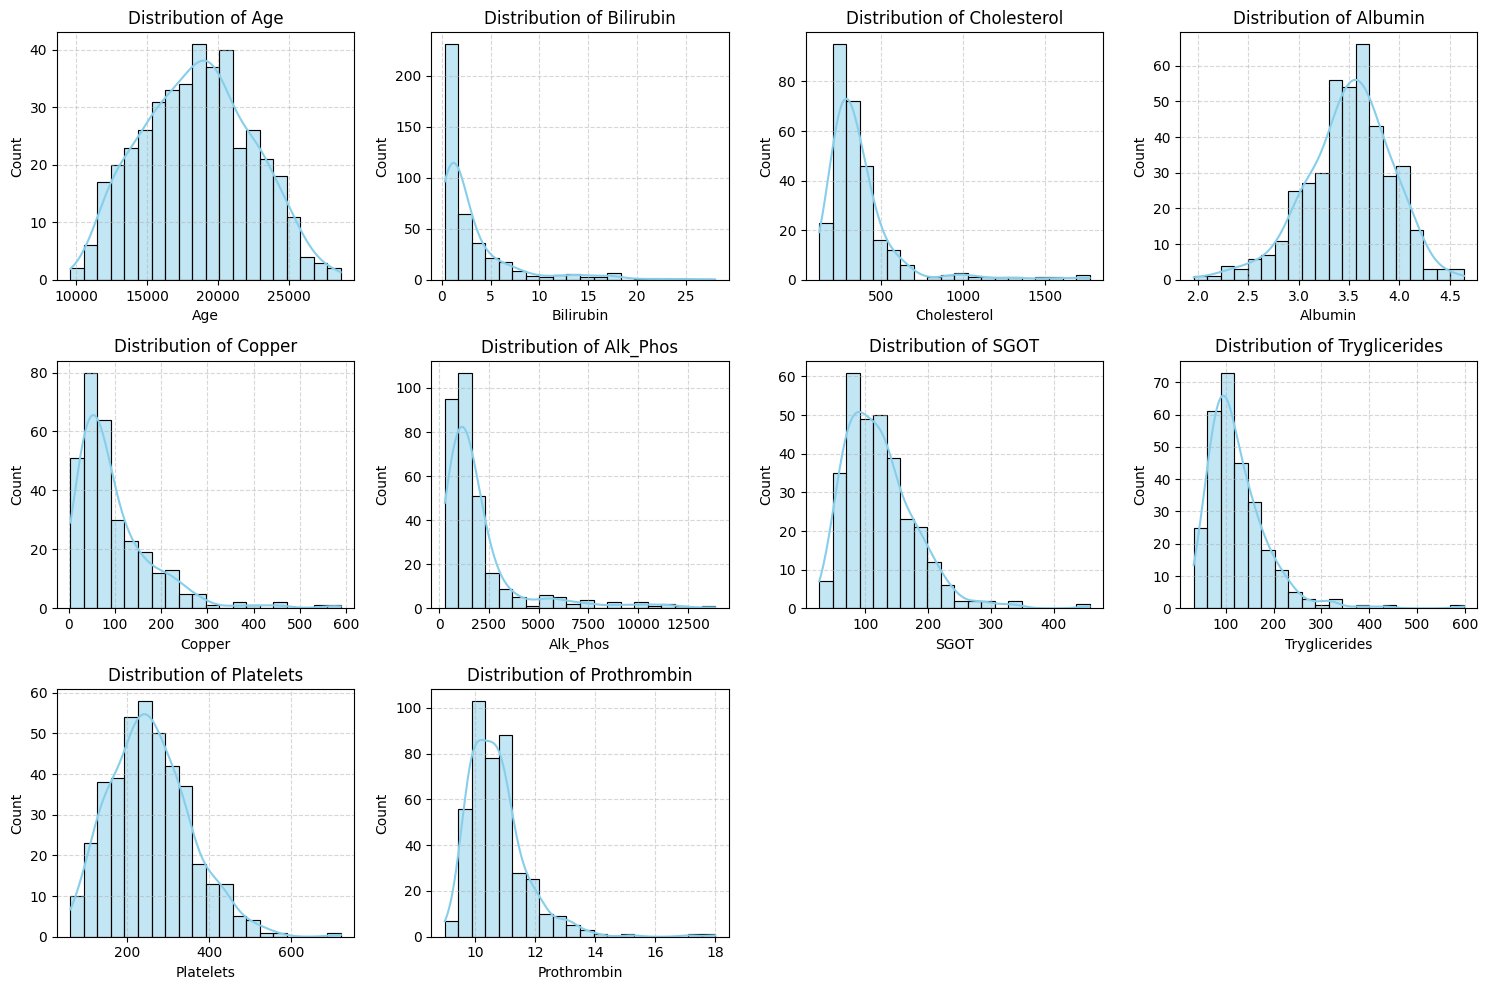

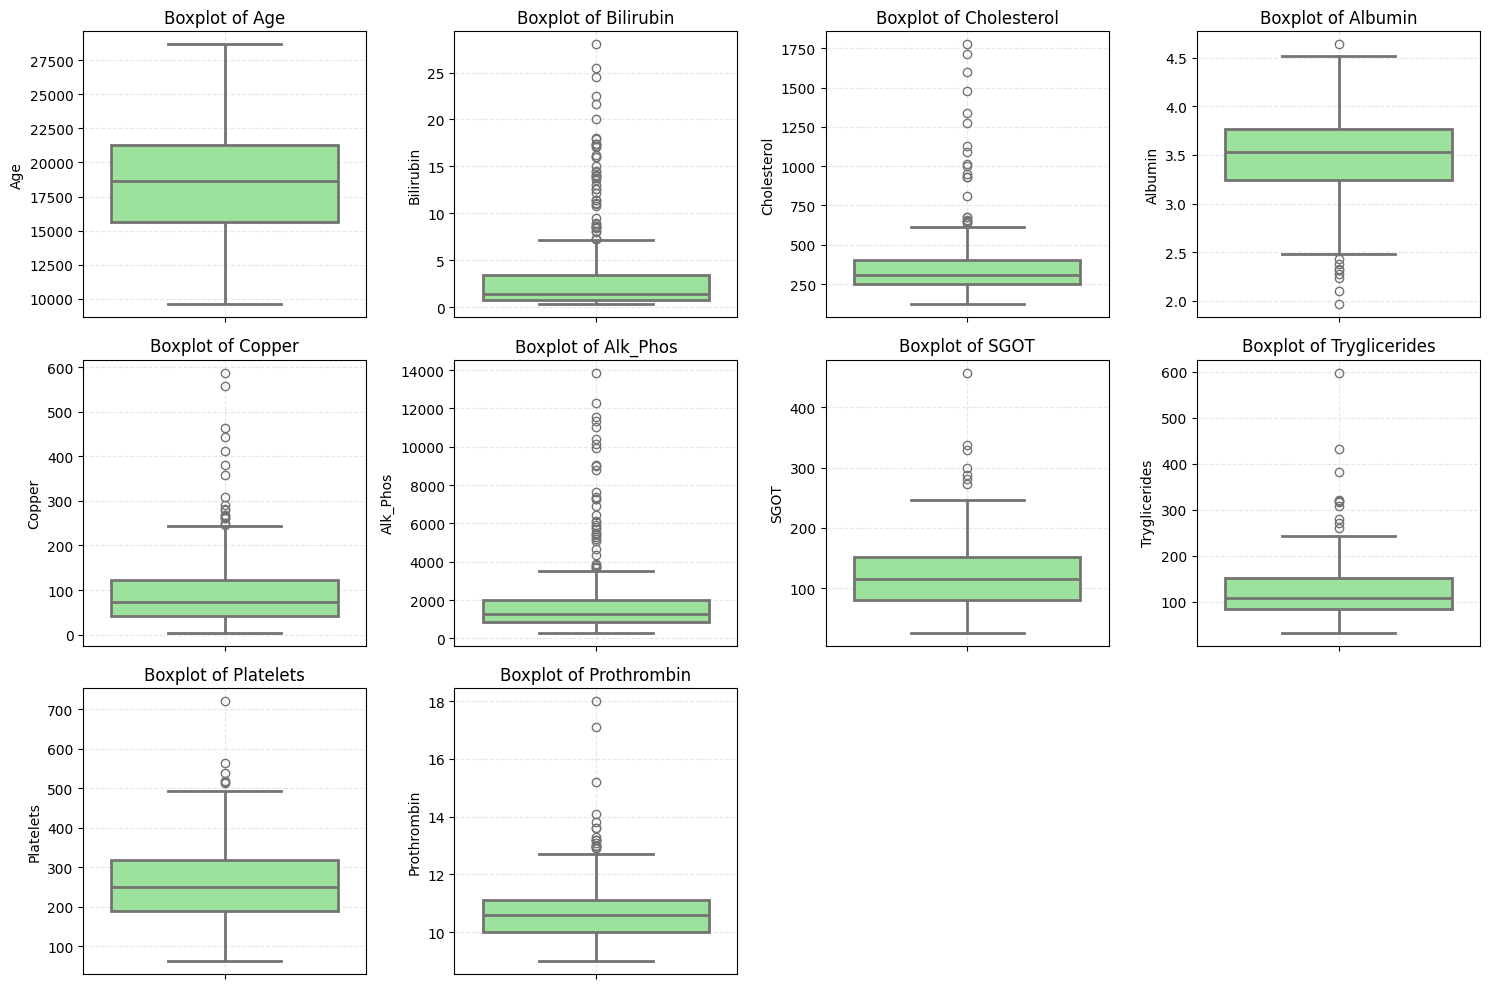

,proportion
Status,
C,0.555024
D,0.385167
CL,0.059809


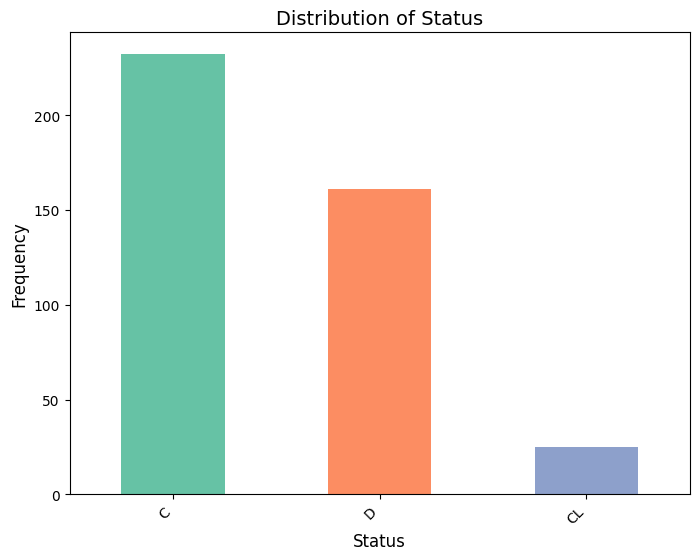

,proportion
Drug,
D-penicillamine,0.50641
Placebo,0.49359


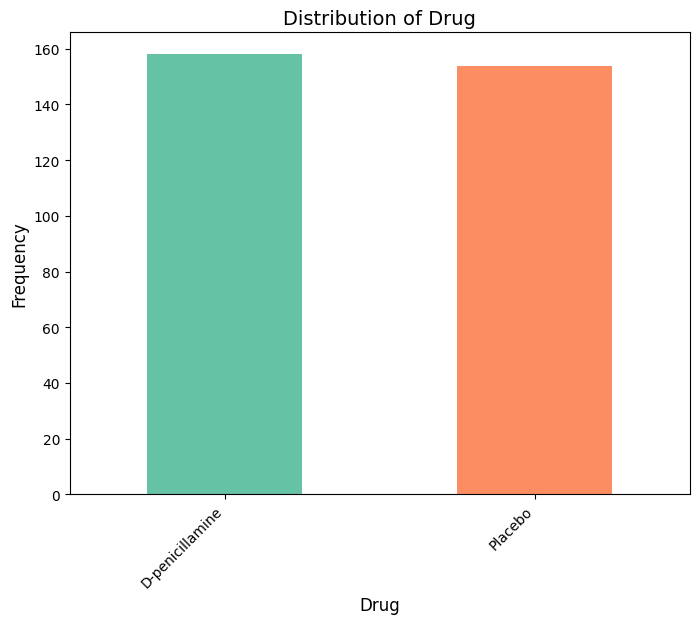

,proportion
Sex,
F,0.894737
M,0.105263


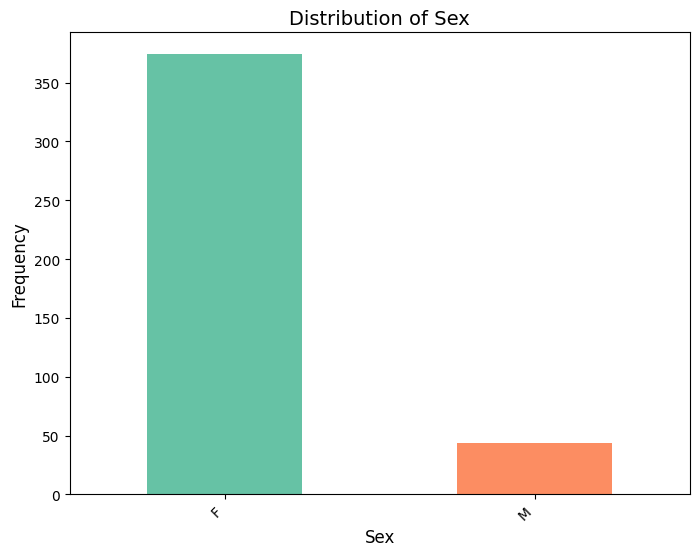

,proportion
Ascites,
N,0.923077
Y,0.076923


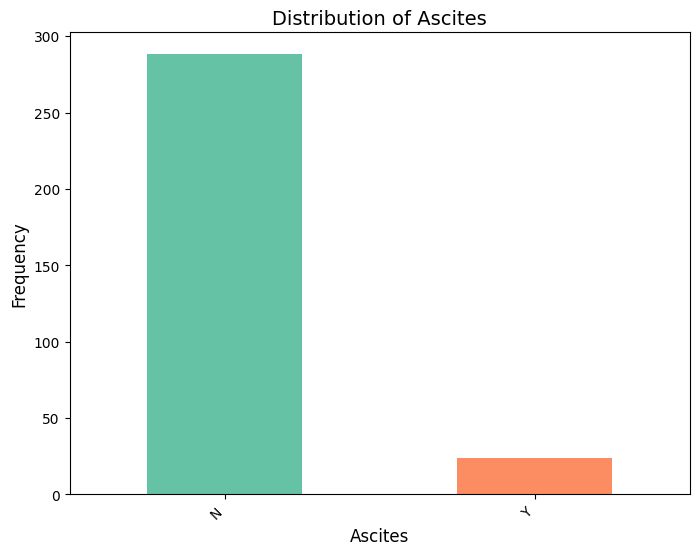

,proportion
Hepatomegaly,
Y,0.512821
N,0.487179


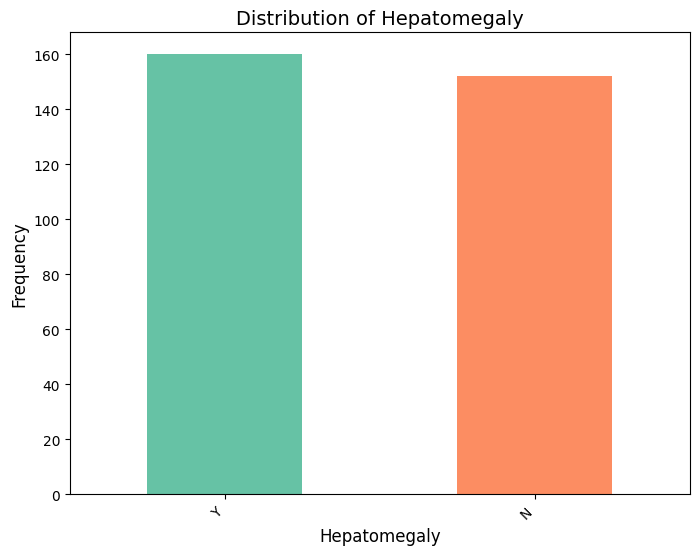

,proportion
Spiders,
N,0.711538
Y,0.288462


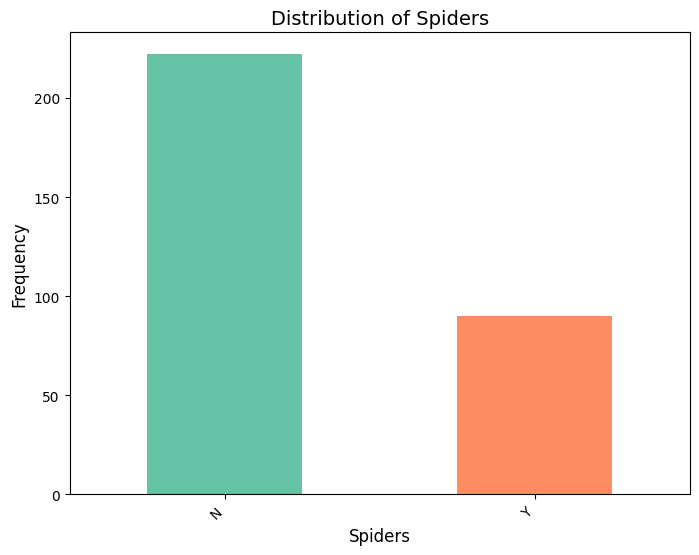

,proportion
Edema,
N,0.846890
S,0.105263
Y,0.047847


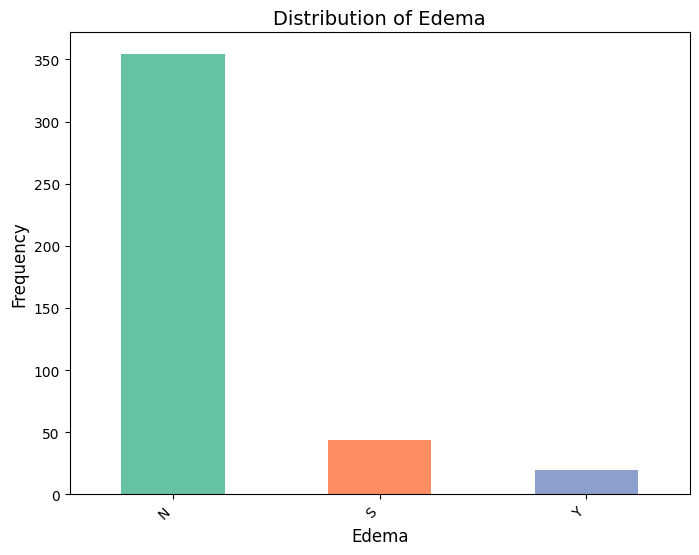

,proportion
Stage,
3.0,0.376214
4.0,0.349515
2.0,0.223301
1.0,0.050971


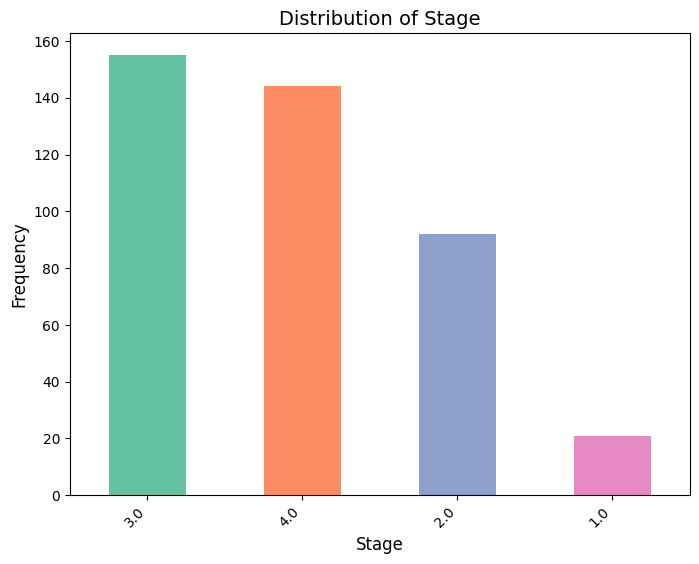

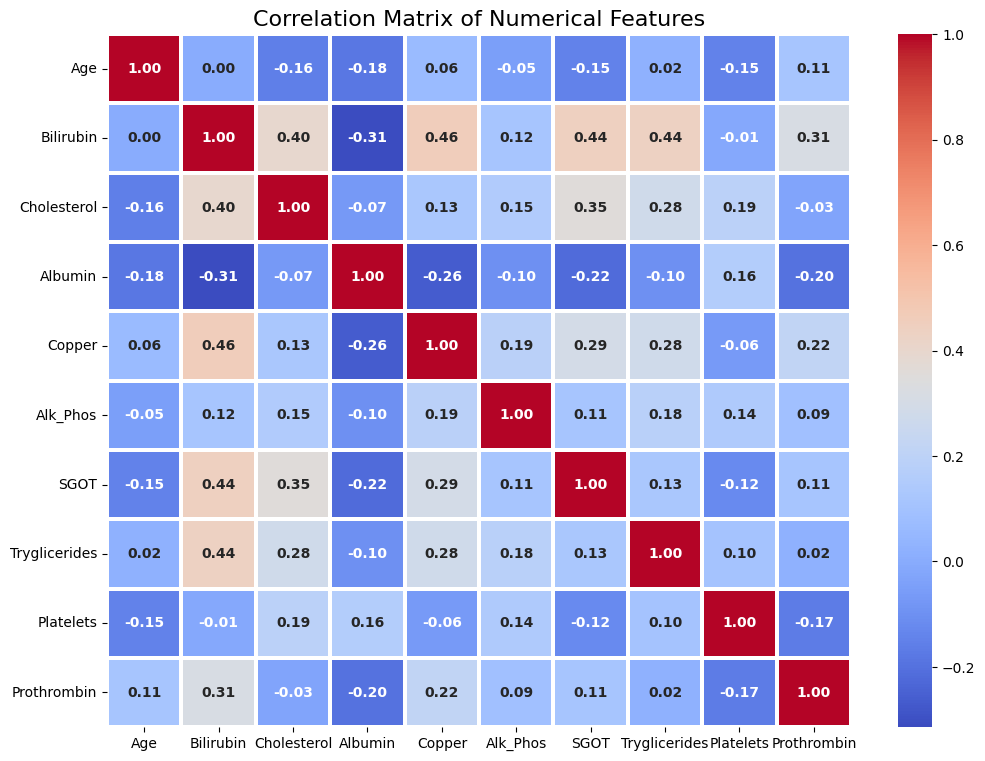

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive Statistics
numerical_features = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
# Replace df with your dataset
display(df[numerical_features].describe())

# Missing Value Analysis
# Replace df with your dataset
missing_values = df.isnull().sum()
display(missing_values)

# Improved Missing Value Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm', linewidths=0.5)
plt.title('Improved Missing Value Heatmap', fontsize=16)
plt.show()

# Data Distribution Visualization with enhanced style
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 4, i + 1)
    # Improved histogram style
    # The line_kws parameter is used to control the appearance of the KDE line in sns.histplot.
    sns.histplot(df[col].dropna(), kde=True, color='skyblue', bins=20, line_kws={"color": "red"})
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Boxplot with color and style modifications
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 4, i + 1)
    # Modify boxplot style
    sns.boxplot(y=df[col], color='lightgreen', linewidth=2)
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Categorical Variable Exploration with different bar colors
categorical_features = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']
for col in categorical_features:
    display(df[col].value_counts(normalize=True))
    plt.figure(figsize=(8, 6))
    # Enhanced bar plot with different color palette
    df[col].value_counts().plot(kind='bar', color=sns.color_palette("Set2", len(df[col].value_counts())))
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Correlation Analysis with improved heatmap
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1.5, annot_kws={"size": 10, "weight": "bold"})
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

# 3. Pemodelan (Model Klasifikasi)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Pisahkan fitur dan target
X = df.drop(columns=['Status'])
y = df['Status']

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

# 4. Evaluasi

In [35]:
from sklearn.metrics import classification_report, accuracy_score

# Prediksi data uji
y_pred = model.predict(X_test)

# Evaluasi hasil
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)

print("Akurasi:", accuracy)
print("Laporan Klasifikasi:\n", report)

print("Distribusi label di data latih:\n", y_train.value_counts())
print("Distribusi label di data uji:\n", y_test.value_counts())


Akurasi: 0.8095238095238095
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85        44
           1       0.00      0.00      0.00         4
           2       0.85      0.78      0.81        36

    accuracy                           0.81        84
   macro avg       0.55      0.56      0.55        84
weighted avg       0.78      0.81      0.79        84

Distribusi label di data latih:
 Status
0    188
2    125
1     21
Name: count, dtype: int64
Distribusi label di data uji:
 Status
0    44
2    36
1     4
Name: count, dtype: int64
